# <center style="font-family: consolas; font-size: 32px; font-weight: bold;">Hepatitis C Classification Using Liver Function Blood Test</center>
<p><center style="color:#949494; font-family: consolas; font-size: 20px;">PDS Project</center></p>

***

# <center style="font-family: consolas; font-size: 32px; font-weight: bold;">**Results:** 94% Accuracy</center>






In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sb

import math

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, train_test_split, RepeatedStratifiedKFold
#from sklearn.feature_selection import RFE, RFECV

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('HepatitisCdata.csv')
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.50,52.50,7.70,22.10,7.50,6.93,3.23,106.00,12.10,69.00
1,2,0=Blood Donor,32,m,38.50,70.30,18.00,24.70,3.90,11.17,4.80,74.00,15.60,76.50
2,3,0=Blood Donor,32,m,46.90,74.70,36.20,52.60,6.10,8.84,5.20,86.00,33.20,79.30
3,4,0=Blood Donor,32,m,43.20,52.00,30.60,22.60,18.90,7.33,4.74,80.00,33.80,75.70
4,5,0=Blood Donor,32,m,39.20,74.10,32.60,24.80,9.60,9.15,4.32,76.00,29.90,68.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.00,416.60,5.90,110.30,50.00,5.57,6.30,55.70,650.90,68.50
611,612,3=Cirrhosis,64,f,24.00,102.80,2.90,44.40,20.00,1.54,3.02,63.00,35.90,71.30
612,613,3=Cirrhosis,64,f,29.00,87.30,3.50,99.00,48.00,1.66,3.63,66.70,64.20,82.00
613,614,3=Cirrhosis,46,f,33.00,NaN,39.00,62.00,20.00,3.56,4.20,52.00,50.00,71.00


In [ ]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.50,52.50,7.70,22.10,7.50,6.93,3.23,106.00,12.10,69.00
1,2,0=Blood Donor,32,m,38.50,70.30,18.00,24.70,3.90,11.17,4.80,74.00,15.60,76.50
2,3,0=Blood Donor,32,m,46.90,74.70,36.20,52.60,6.10,8.84,5.20,86.00,33.20,79.30
3,4,0=Blood Donor,32,m,43.20,52.00,30.60,22.60,18.90,7.33,4.74,80.00,33.80,75.70
4,5,0=Blood Donor,32,m,39.20,74.10,32.60,24.80,9.60,9.15,4.32,76.00,29.90,68.70


#**EDA**

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df) * 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['average'] = desc['mean'].values
    summ['standard_deviation'] = desc['std'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values

    return summ
summary(df).style.background_gradient(cmap='YlOrBr')

data shape: (615, 14)


,data type,#missing,%missing,#unique,min,max,average,standard_deviation,first value,second value,third value
Unnamed: 0,int64,0,0.000000,615,1.000000,615.000000,308.000000,177.679487,1,2,3
Category,object,0,0.000000,5,nan,nan,nan,nan,0=Blood Donor,0=Blood Donor,0=Blood Donor
Age,int64,0,0.000000,49,19.000000,77.000000,47.408130,10.055105,32,32,32
Sex,object,0,0.000000,2,nan,nan,nan,nan,m,m,m
ALB,float64,1,0.162602,189,14.900000,82.200000,41.620195,5.780629,38.500000,38.500000,46.900000
ALP,float64,18,2.926829,414,11.300000,416.600000,68.283920,26.028315,52.500000,70.300000,74.700000
ALT,float64,1,0.162602,341,0.900000,325.300000,28.450814,25.469689,7.700000,18.000000,36.200000
AST,float64,0,0.000000,297,10.600000,324.000000,34.786341,33.090690,22.100000,24.700000,52.600000
BIL,float64,0,0.000000,188,0.800000,254.000000,11.396748,19.673150,7.500000,3.900000,6.100000
CHE,float64,0,0.000000,407,1.420000,16.410000,8.196634,2.205657,6.930000,11.170000,8.840000


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Data summary:</font></h3>

- **Total Number of Variables**: 14
- **Data Types**:
  * **Float64**: 10
  * **Int64**: 2
  * **Object**: 2
- **Missing Values**: `columns_missing = ["ALB","ALP","ALT","CHOL", "PROT"]`
- **Target Variable**: 'Category'= ('0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')

<h4 align="left">💼 Features Overview:</h4>
    
All attributes except Category and Sex are numerical.
Attributes 1 to 4 refer to the data of the patient:
1. X (Patient ID/No.)
2. Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')
3. Age (in years)
4. Sex (f,m)
Attributes 5 to 14 refer to laboratory data:
5. ALB
6. ALP
7. ALT
8. AST
9. BIL
10. CHE
11. CHOL
12. CREA
13. GGT
14. PROT

The target attribute for classification is Category (2): blood donors vs. Hepatitis C patients (including its progress ('just' Hepatitis C, Fibrosis, Cirrhosis).    

In [ ]:
columns_missing = ["ALB","ALP","ALT","CHOL", "PROT"]

In [ ]:
df[columns_missing]

,ALB,ALP,ALT,CHOL,PROT
0,38.50,52.50,7.70,3.23,69.00
1,38.50,70.30,18.00,4.80,76.50
2,46.90,74.70,36.20,5.20,79.30
3,43.20,52.00,30.60,4.74,75.70
4,39.20,74.10,32.60,4.32,68.70
...,...,...,...,...,...
610,32.00,416.60,5.90,6.30,68.50
611,24.00,102.80,2.90,3.02,71.30
612,29.00,87.30,3.50,3.63,82.00
613,33.00,NaN,39.00,4.20,71.00


In [ ]:
df.drop("Unnamed: 0", inplace=True, axis= 1)

In [ ]:
df['Category'] = df['Category'].replace({'0=Blood Donor': 'Normal', '0s=suspect Blood Donor':'Normal' , '1=Hepatitis': "Hepatitis", '2=Fibrosis': "Fibrosis", '3=Cirrhosis': "Cirrhosis"})
df['Sex'] = df['Sex'].replace({'m': "Male", 'f': "Female"})

In [ ]:
num_var = [column for column in df.columns if df[column].nunique() > 10]
cat_var = [column for column in df.columns if df[column].nunique() < 10]

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>

* We only have one Categorical variable except Target, for now at least.

In [ ]:
def plot_count(df,columns,n_cols,hue):
    '''
    # Function to genear countplot
    df: total data
    columns: category variables
    n_cols: num of cols
    '''
    n_rows = (len(columns) - 1) // n_cols + 1
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(17, 4 * n_rows))
    ax = ax.flatten()

    for i, column in enumerate(columns):
        sns.countplot(data=df, x=column, ax=ax[i],hue=hue)

        # Titles
        ax[i].set_title(f'{column} Counts', fontsize=18)
        ax[i].set_xlabel(None, fontsize=16)
        ax[i].set_ylabel(None, fontsize=16)
        ax[i].tick_params(axis='x', rotation=10)

        for p in ax[i].patches:
            value = int(p.get_height())
            ax[i].annotate(f'{value:.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                           ha='center', va='bottom', fontsize=9)

    ylim_top = ax[i].get_ylim()[1]
    ax[i].set_ylim(top=ylim_top * 1.1)
    for i in range(len(columns), len(ax)):
        ax[i].axis('off')

    # fig.suptitle(plotname, fontsize=25, fontweight='bold')
    plt.tight_layout()
    plt.show()


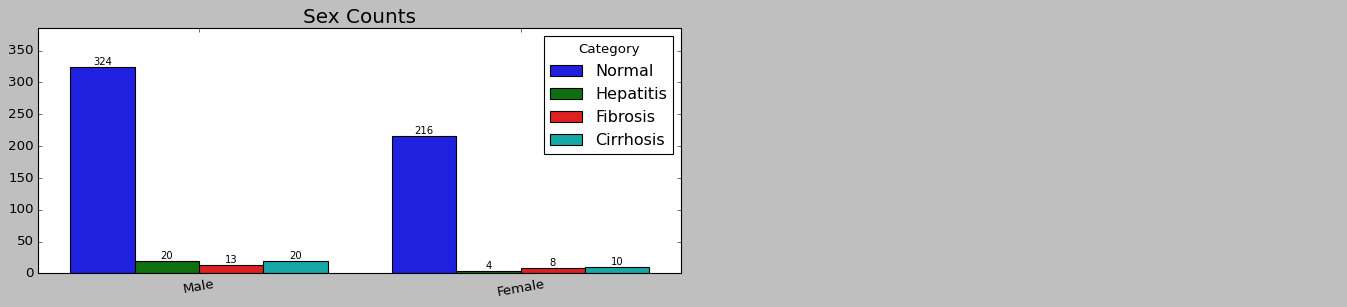

In [ ]:
plot_count(df, ["Sex"], 2,"Category")

<div style="border-radius:10px; border:#87d8de solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#87d8de'>💡 Observations Post-Visualization:</font></h3>

* Class is imblanced and data offers few data points in the classes we want to predict.

In [ ]:
num_var

['Age',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT']

In [ ]:
def plot_pair(df_train,num_var,target,plotname):
    '''
    Funtion to make a pairplot:
    df_train: total data
    num_var: a list of numeric variable
    target: target variable
    '''
    g = sns.pairplot(data=df_train, x_vars=num_var, y_vars=num_var, hue=target, corner=True)
    g._legend.set_bbox_to_anchor((0.8, 0.7))
    g._legend.set_title(target)
    g._legend.loc = 'upper center'
    g._legend.get_title().set_fontsize(14)
    for item in g._legend.get_texts():
        item.set_fontsize(14)

    plt.suptitle(plotname, ha='center', fontweight='bold', fontsize=25, y=0.98)
    plt.show()


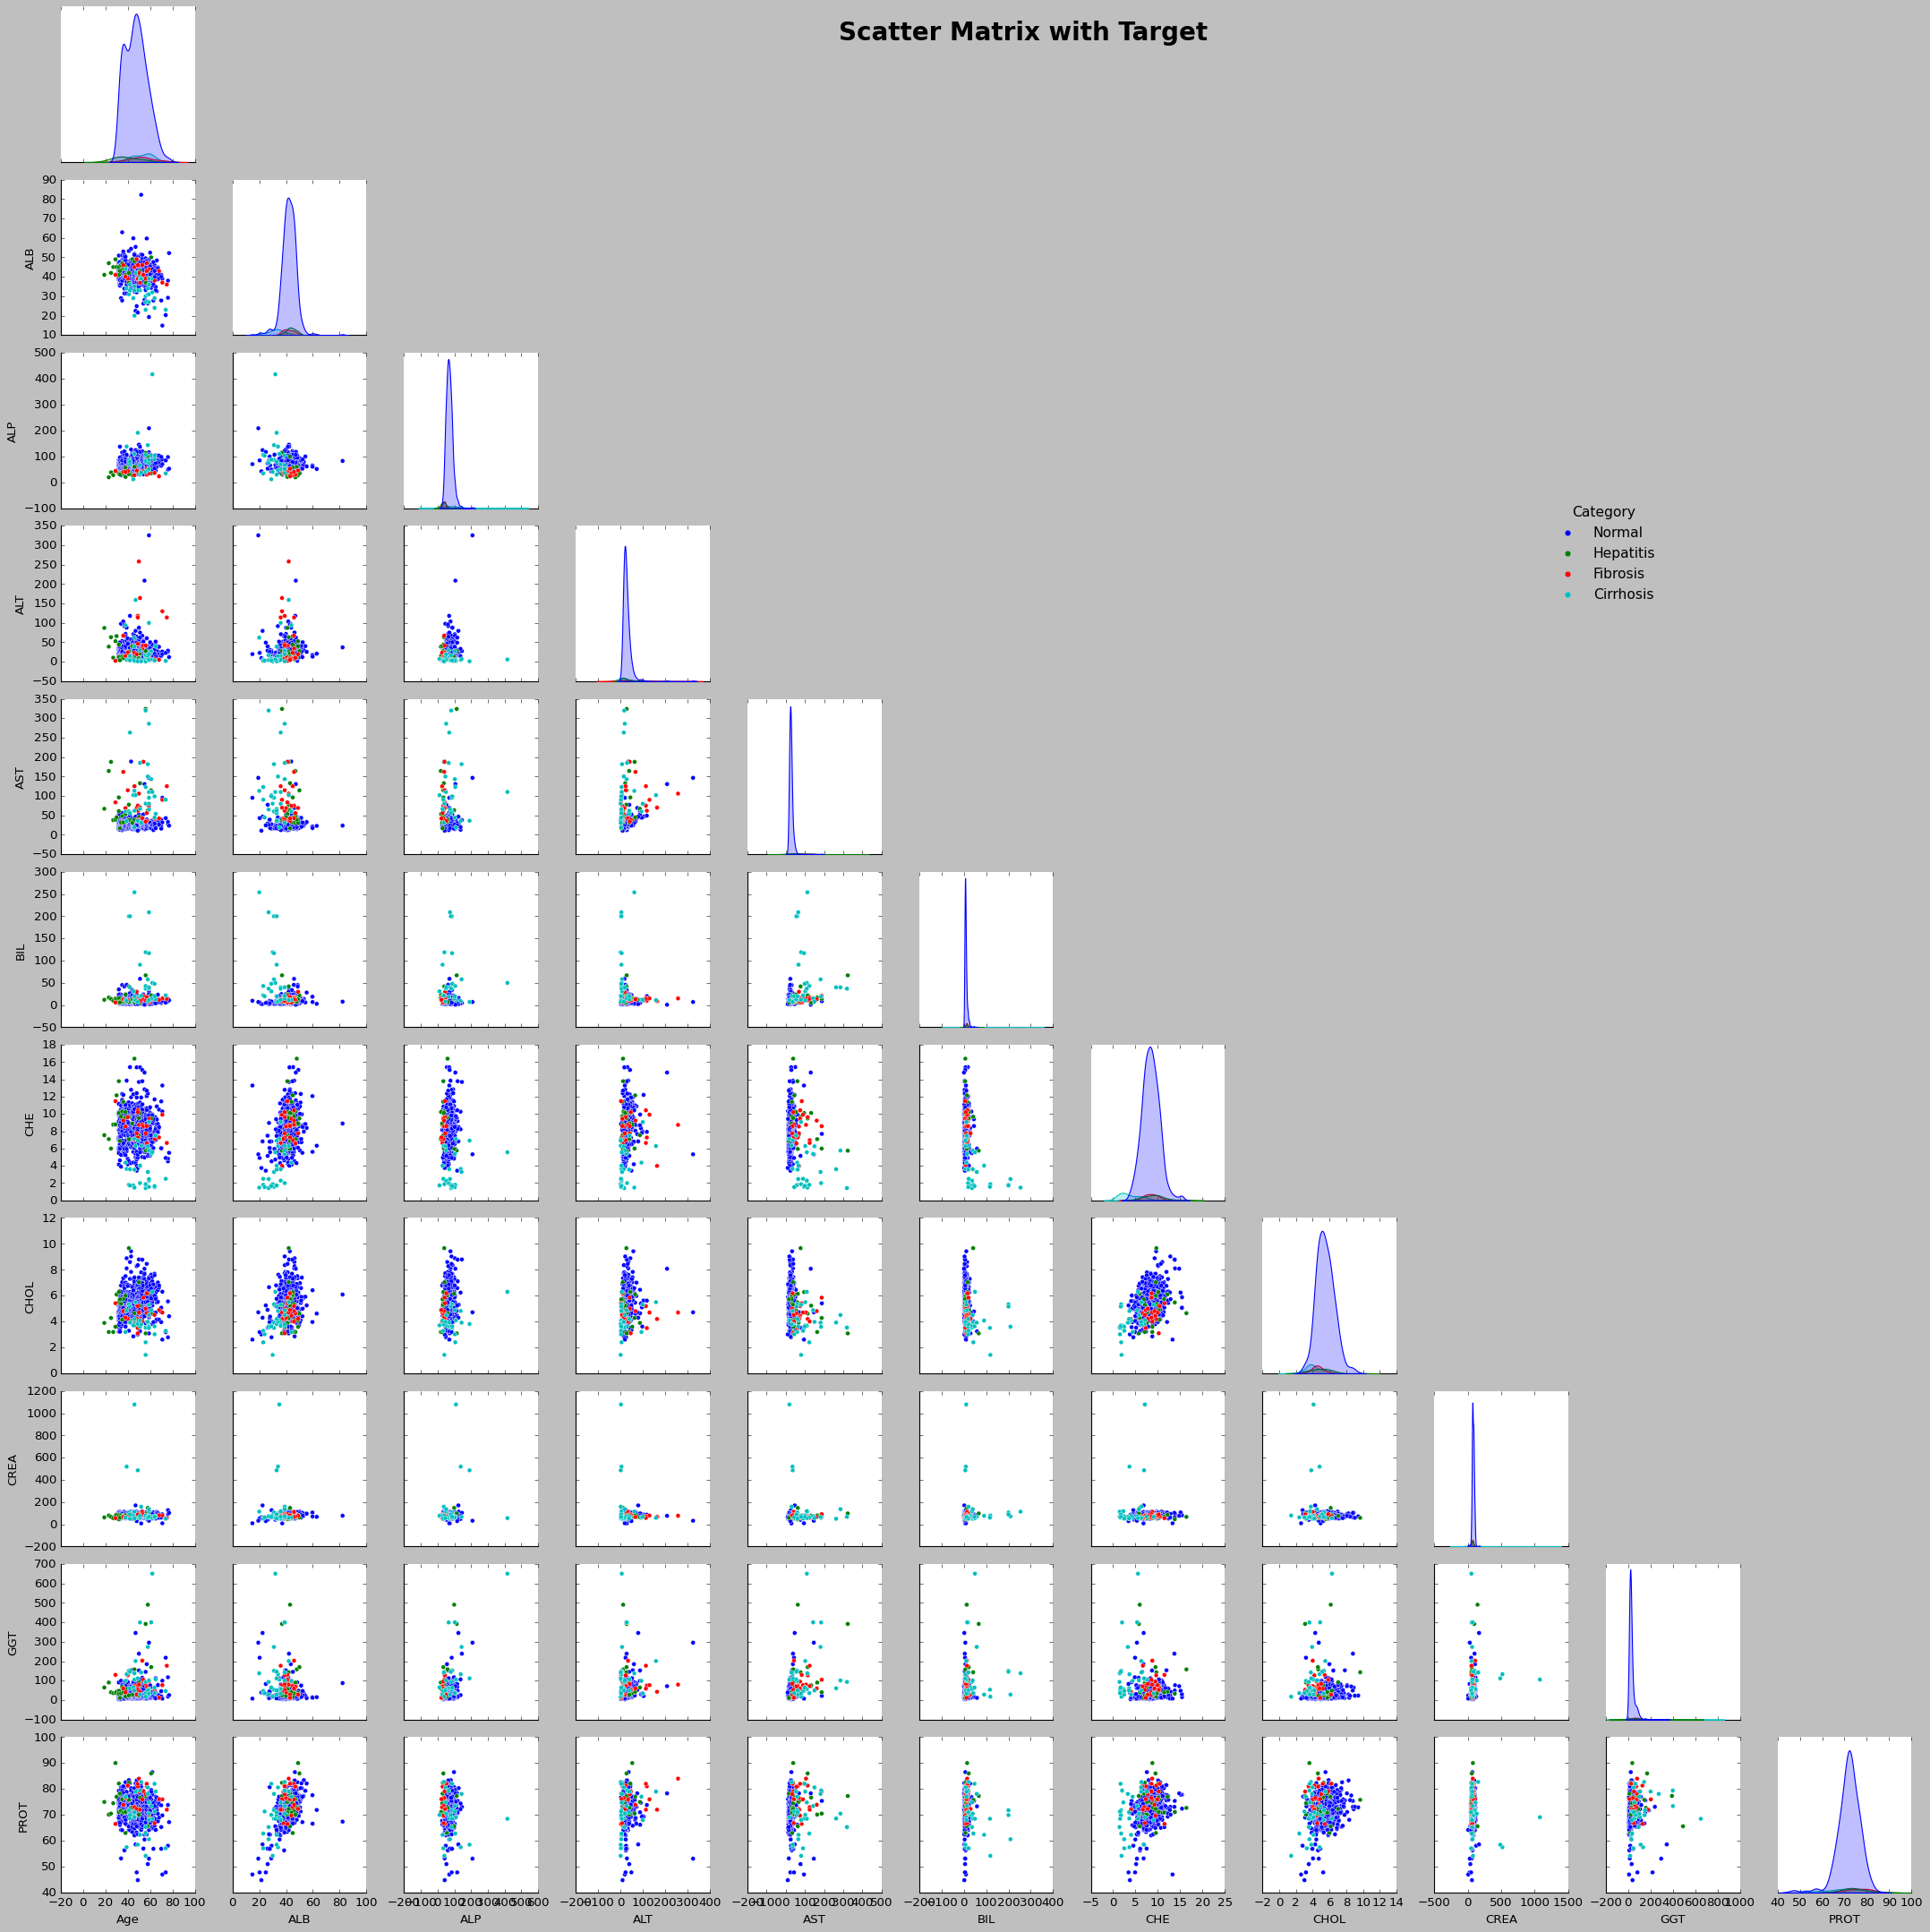

In [ ]:
plot_pair(df,num_var,"Category",plotname = 'Scatter Matrix with Target')

Text(0.5, 0, 'GGT')

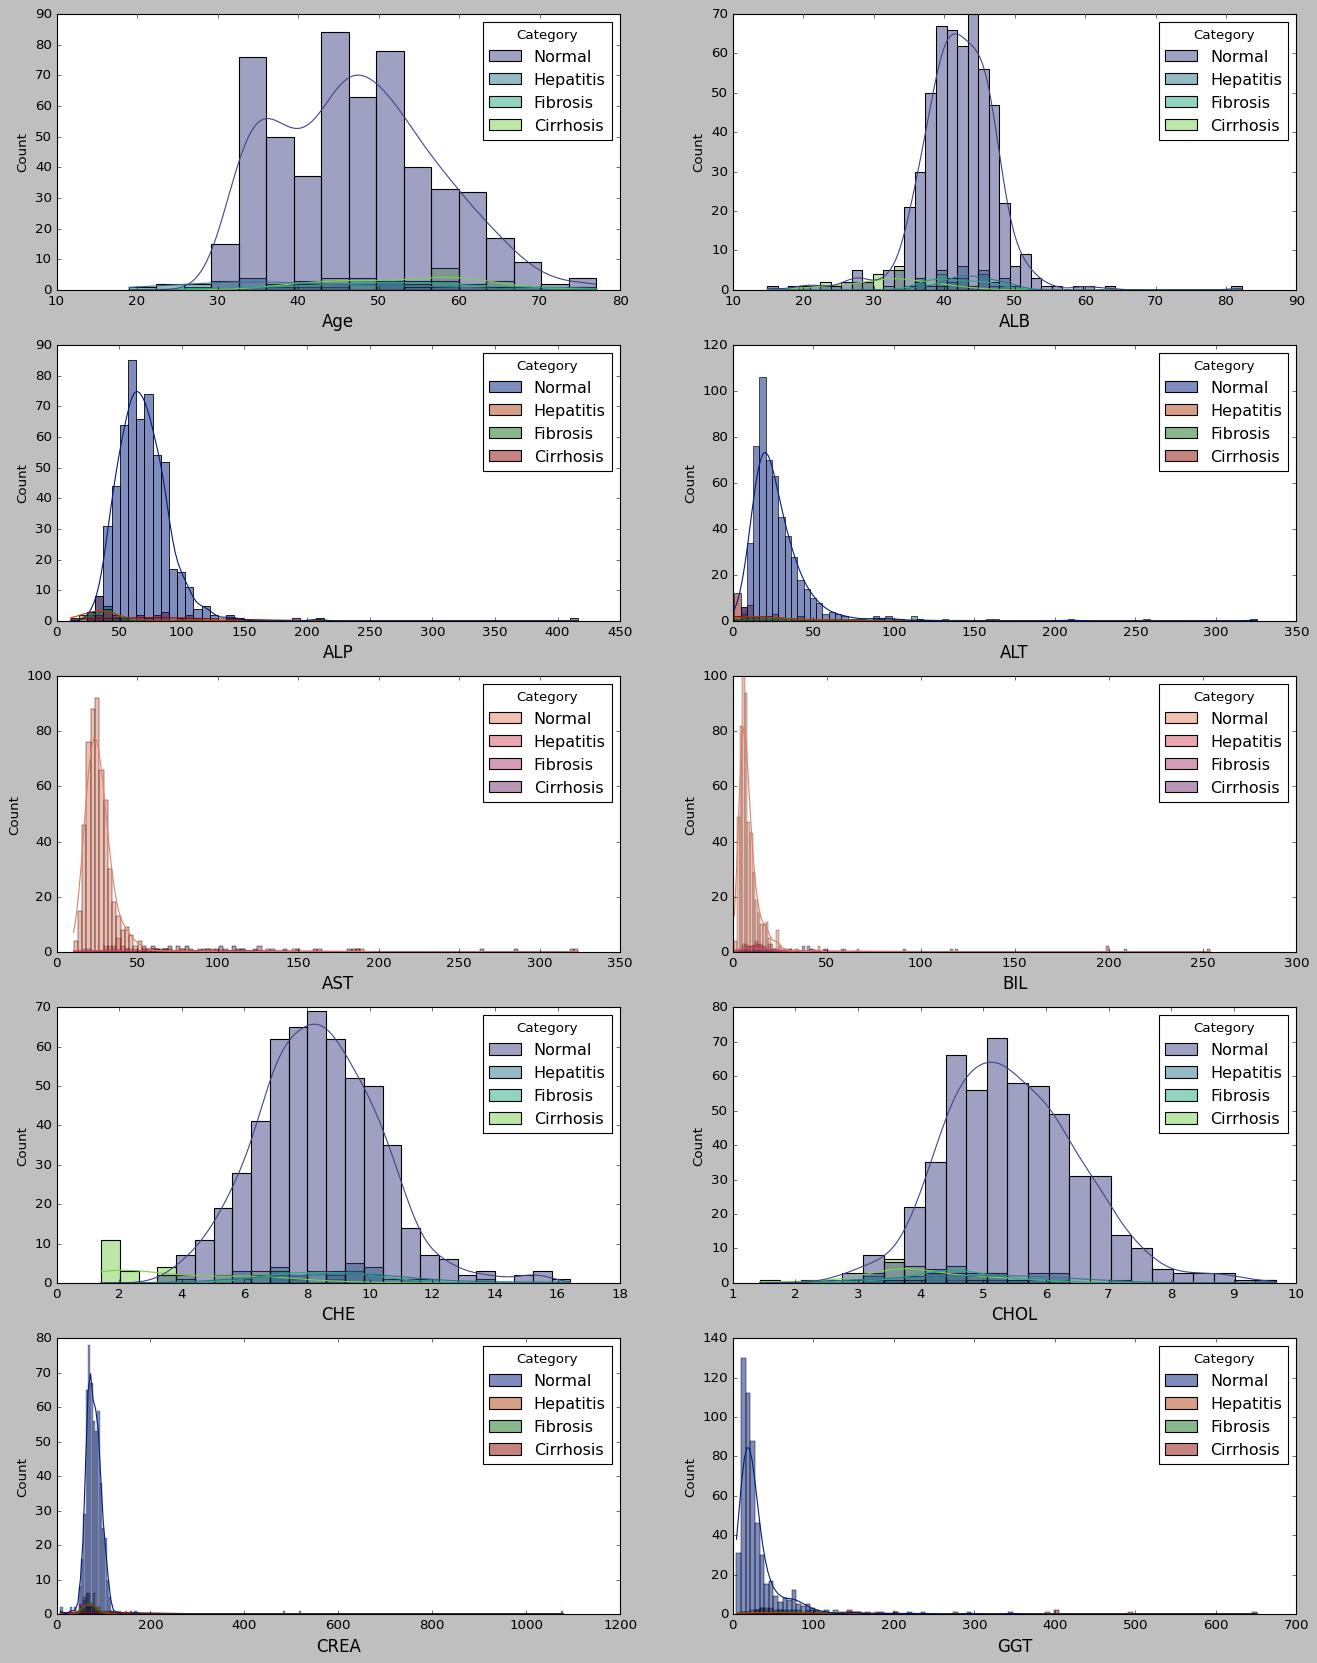

In [ ]:
fig, ax = plt.subplots(5,2, figsize=(20,25))
plt.style.use("classic")


sns.histplot(x = df["Age"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,0])
ax[0,0].set_xlabel("Age",fontsize=15)

sns.histplot(x = df["ALB"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,1])
ax[0,1].set_xlabel("ALB",fontsize=15)

sns.histplot(x = df["ALP"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,0])
ax[1,0].set_xlabel("ALP",fontsize=15)

sns.histplot(x = df["ALT"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,1])
ax[1,1].set_xlabel("ALT",fontsize=15)

sns.histplot(x = df["AST"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,0])
ax[2,0].set_xlabel("AST",fontsize=15)

sns.histplot(x = df["BIL"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,1])
ax[2,1].set_xlabel("BIL",fontsize=15)

sns.histplot(x = df["CHE"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,0])
ax[3,0].set_xlabel("CHE",fontsize=15)

sns.histplot(x = df["CHOL"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,1])
ax[3,1].set_xlabel("CHOL",fontsize=15)

sns.histplot(x = df["CREA"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,0])
ax[4,0].set_xlabel("CREA",fontsize=15)

sns.histplot(x = df["GGT"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,1])
ax[4,1].set_xlabel("GGT",fontsize=15)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>

* Not making plots for finding Outliers because in Medical Data we tend to include them as they can be the main source for Abnormility, that we want to predict.

In [ ]:
df5 = df.copy()
df_plot = df.copy()
label_mapping = {
    'Normal': 0,
    'Cirrhosis': 1,
    'Fibrosis': 2,
    'Hepatitis': 3
}

co = ['Age',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT','Category']
df_plot['Category'] = df5['Category'].replace(label_mapping)

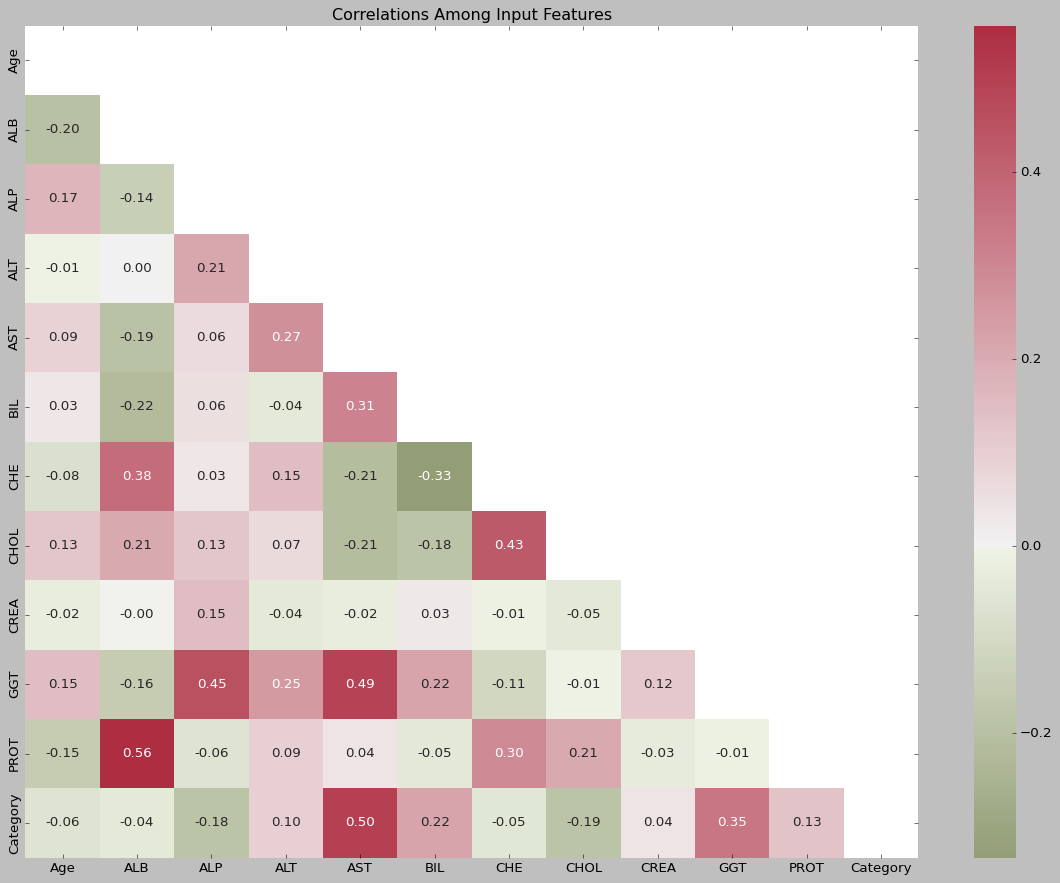

In [ ]:
corr_mat = df_plot[co].corr()
data_mask = np.triu(np.ones_like(corr_mat, dtype = bool))
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)
f, ax = plt.subplots(figsize = (18, 13))
sns.heatmap(corr_mat, annot = True, cmap = cmap, fmt = '.2f', center = 0,
            annot_kws = {'size': 12}, mask = data_mask).set_title('Correlations Among Input Features');

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>

* No multicollinearity.

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4bce55; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">💽 Preprocessing</p>

<Axes: >

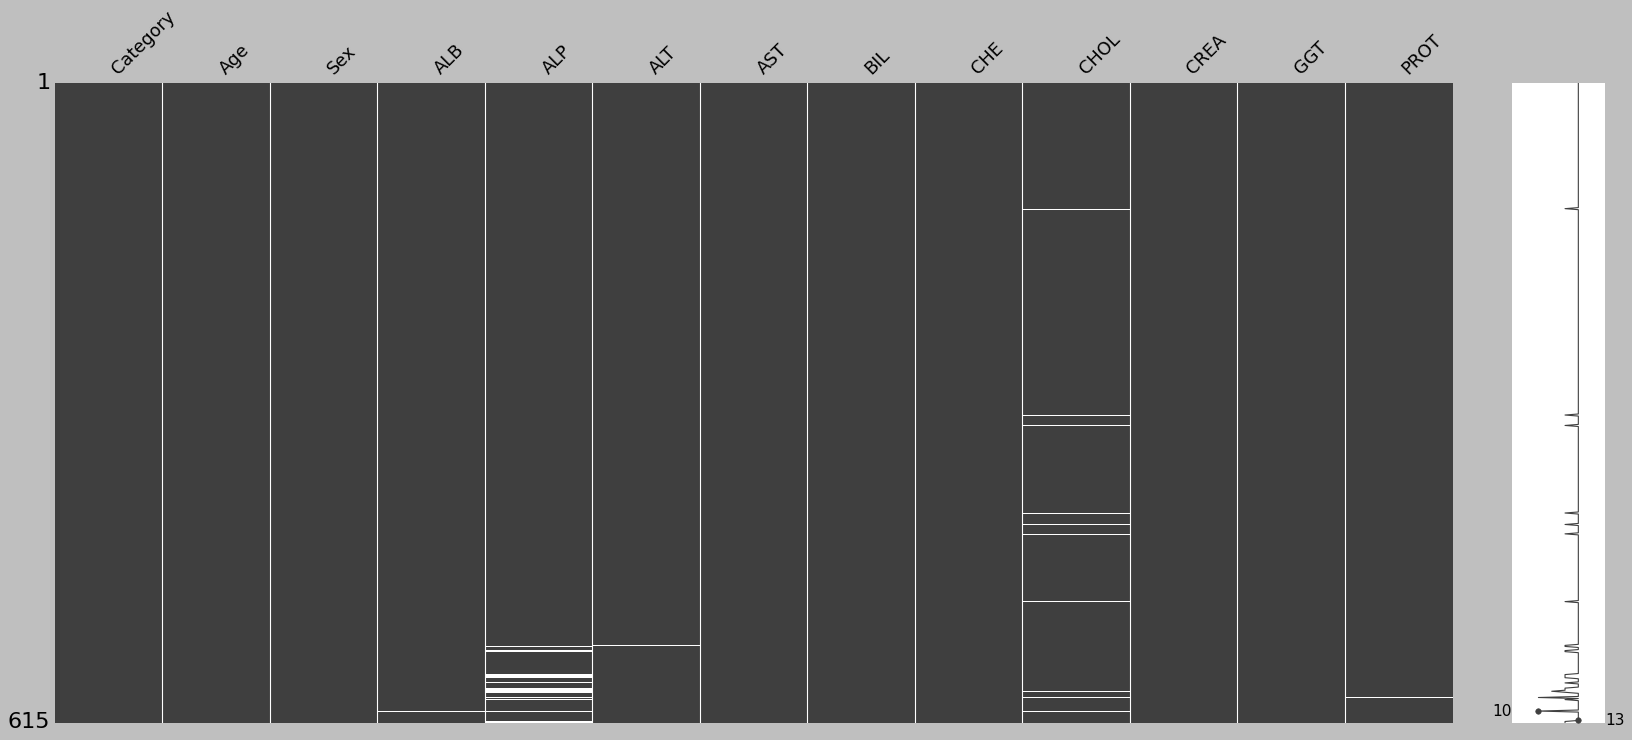

In [ ]:
import missingno as mn
mn.matrix(df)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 How do we deal with null values?:</font></h3>

* Our solution is repalcing it with the average value in that domain.
* Or use KNN imputer

In [ ]:
df['Sex'] = df['Sex'].replace({'Male':1,"Female":2})

In [ ]:
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(df[num_var])
df[num_var] = imputed

<Axes: >

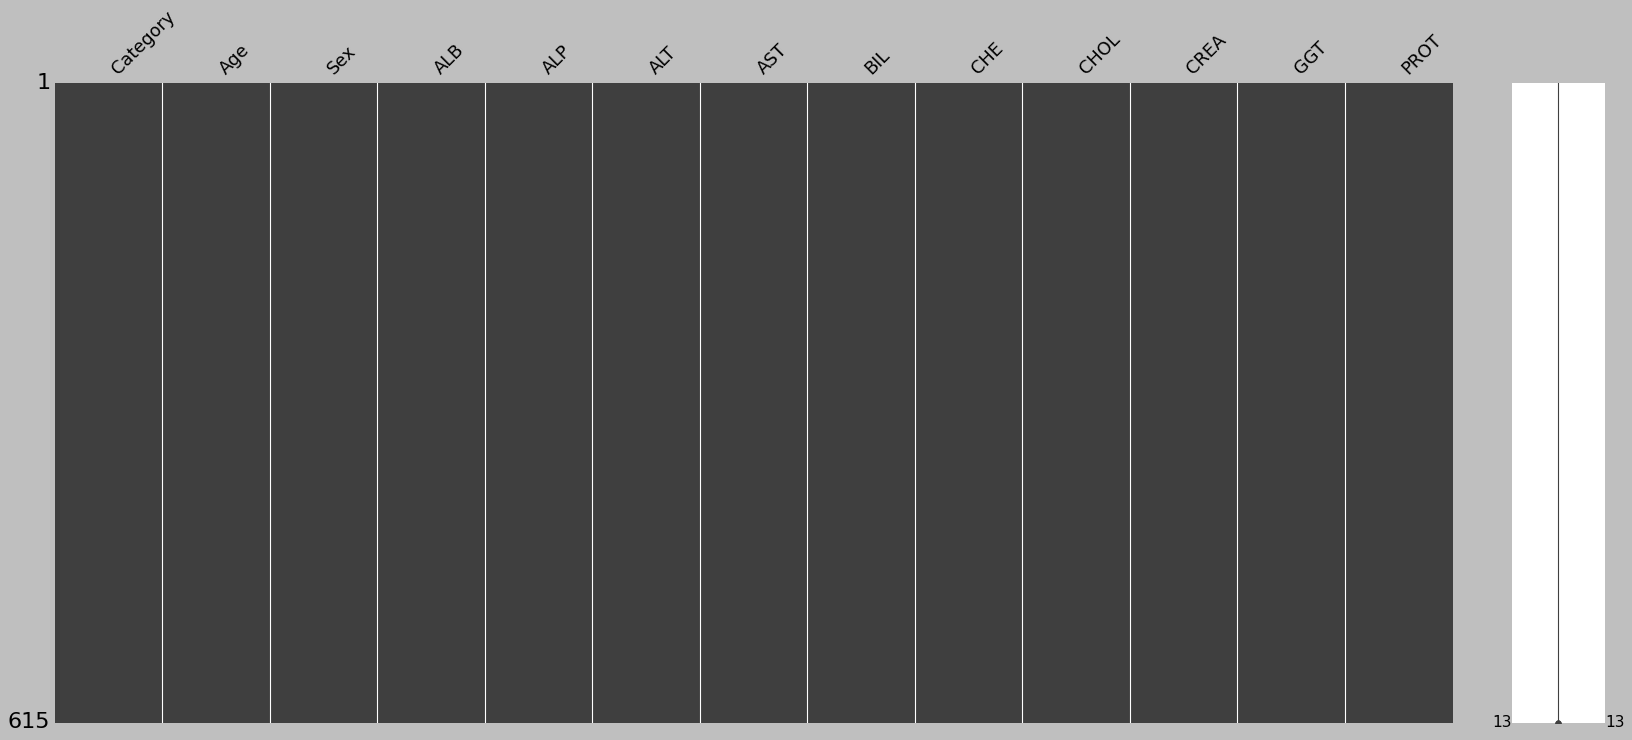

In [ ]:
df.isna().count()
mn.matrix(df)

In [ ]:
#add code to convert categorical variable to normal

In [ ]:
#df = pd.getDummies(df.drop("Category", axis = 1))

| LFT Marker                   | Normal Range          |
|------------------------------|-----------------------|
| ALT (Alanine Aminotransferase) | 7 - 56 U/L           |
| AST (Aspartate Aminotransferase) | 10 - 40 U/L          |
| ALP (Alkaline Phosphatase)     | 44 - 147 U/L         |
| Total Bilirubin               | 3.4 - 20.5 µmol/L     |
| Albumin                      | 35 - 52 g/L           |
| Total Protein                | 60 - 80 g/L           |




In [ ]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,Normal,32.00,1,38.50,52.50,7.70,22.10,7.50,6.93,3.23,106.00,12.10,69.00
1,Normal,32.00,1,38.50,70.30,18.00,24.70,3.90,11.17,4.80,74.00,15.60,76.50
2,Normal,32.00,1,46.90,74.70,36.20,52.60,6.10,8.84,5.20,86.00,33.20,79.30
3,Normal,32.00,1,43.20,52.00,30.60,22.60,18.90,7.33,4.74,80.00,33.80,75.70
4,Normal,32.00,1,39.20,74.10,32.60,24.80,9.60,9.15,4.32,76.00,29.90,68.70


In [ ]:
conditions = [
    (df['ALT'] > 56),
    (df['ALT'] <= 56) & (df['ALT'] >= 7),
    (df['ALT']<7)
    ]
values = [1,0,1]
df['ALT_MAP'] = np.select(conditions, values)

In [ ]:
conditions = [
    (df['AST'] > 40),
    (df['AST'] <= 40) & (df['AST'] >= 10),
    (df['AST']<10)
    ]
values = [1,0,1]
df['AST_MAP'] = np.select(conditions, values)

In [ ]:
conditions = [
    (df['ALP'] > 147),
    (df['ALP'] <= 147) & (df['ALP'] >= 44),
    (df['ALP']<44)
    ]
values = [1,0,1]
df['ALP_MAP'] = np.select(conditions, values)

In [ ]:
conditions = [
    (df['ALB'] > 52),
    (df['ALB'] <= 52) & (df['ALB'] >= 35),
    (df['ALB']<35)
    ]
values = [1,0,1]
df['ALB_MAP'] = np.select(conditions, values)

In [ ]:
conditions = [
    (df['BIL'] > 20.5),
    (df['BIL'] <= 20.5) & (df['BIL'] >= 3.4),
    (df['BIL']<3.4)
    ]
values = [1,0,1]
df['BIL_MAP'] = np.select(conditions, values)

In [ ]:
conditions = [
    (df['PROT'] > 80),
    (df['PROT'] <= 80) & (df['PROT'] >= 60),
    (df['PROT']<60)
    ]
values = [1,0,1]
df['PROT_MAP'] = np.select(conditions, values)

In [ ]:
df['Sex'].unique()

array([1, 2])

| Test Marker                  | Normal Range (SI Units)       | Normal Range (Alternative Units) |
|----------------------------- |------------------------------|----------------------------------|
| CHE (Cholinesterase)         | 5000 - 12500 U/L             | N/A (Measured in U/L)           |
| CHOL (Cholesterol)           | Less than 5.2 mmol/L         | Less than 200 mg/dL             |
| CREA (Creatinine)            | 53 - 106 µmol/L (males)      | 0.6 - 1.2 mg/dL (males)         |
|                             | 44 - 97 µmol/L (females)    | 0.5 - 1.1 mg/dL (females)       |
| GGT (Gamma-Glutamyl Transferase) | 9 - 48 U/L (males)       | N/A (Measured in U/L for males) |
|                             | 9 - 32 U/L (females)         | N/A (Measured in U/L for females) |


In [ ]:
conditions = [
    (df['GGT'] > 48)&(df['Sex']=='Male'),
    (df['GGT'] <= 48) & (df['GGT'] >= 9) & (df['Sex']=='Male'),
    (df['GGT']<9)&(df['Sex']=='Male'),(df['GGT'] > 32)&(df['Sex']=='Female'),
    (df['GGT'] <= 32) & (df['GGT'] >= 9) & (df['Sex']=='Female'),
    (df['GGT']<9)&(df['Sex']=='Female')
    ]
values = [1,0,1,1,0,1]
df['GGT_MAP'] = np.select(conditions, values)

In [ ]:
conditions = [
    (df['CREA'] > 106)&(df['Sex']=='Male'),
    (df['CREA'] <= 106) & (df['CREA'] >= 53) & (df['Sex']=='Male'),
    (df['CREA']<53)&(df['Sex']=='Male'),(df['CREA'] > 97)&(df['Sex']=='Female'),
    (df['CREA'] <= 97) & (df['CREA'] >= 44) & (df['Sex']=='Female'),
    (df['CREA']<44)&(df['Sex']=='Female')
    ]
values = [1,0,1,1,0,1]
df['CREA_MAP'] = np.select(conditions, values)

In [ ]:
conditions = [
 (df['CHOL'] > 5.2),
    (df['CHOL']<=5.2)
    ]
values = [1,0]
df['CHOL_MAP'] = np.select(conditions, values)

In [ ]:
conditions = [
    (df['CHE'] > 12),
    (df['CHE'] <= 12) & (df['CHE'] >= 5),
    (df['CHE']<5)
    ]
values = [1,0,1]
df['CHE_MAP'] = np.select(conditions, values)

In [ ]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,ALT_MAP,AST_MAP,ALP_MAP,ALB_MAP,BIL_MAP,PROT_MAP,GGT_MAP,CREA_MAP,CHOL_MAP,CHE_MAP
0,Normal,32.00,1,38.50,52.50,7.70,22.10,7.50,6.93,3.23,106.00,12.10,69.00,0,0,0,0,0,0,0,0,0,0
1,Normal,32.00,1,38.50,70.30,18.00,24.70,3.90,11.17,4.80,74.00,15.60,76.50,0,0,0,0,0,0,0,0,0,0
2,Normal,32.00,1,46.90,74.70,36.20,52.60,6.10,8.84,5.20,86.00,33.20,79.30,0,1,0,0,0,0,0,0,0,0
3,Normal,32.00,1,43.20,52.00,30.60,22.60,18.90,7.33,4.74,80.00,33.80,75.70,0,0,0,0,0,0,0,0,0,0
4,Normal,32.00,1,39.20,74.10,32.60,24.80,9.60,9.15,4.32,76.00,29.90,68.70,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,ALT_MAP,AST_MAP,ALP_MAP,ALB_MAP,BIL_MAP,PROT_MAP,GGT_MAP,CREA_MAP,CHOL_MAP,CHE_MAP
0,Normal,32.00,1,38.50,52.50,7.70,22.10,7.50,6.93,3.23,106.00,12.10,69.00,0,0,0,0,0,0,0,0,0,0
1,Normal,32.00,1,38.50,70.30,18.00,24.70,3.90,11.17,4.80,74.00,15.60,76.50,0,0,0,0,0,0,0,0,0,0
2,Normal,32.00,1,46.90,74.70,36.20,52.60,6.10,8.84,5.20,86.00,33.20,79.30,0,1,0,0,0,0,0,0,0,0
3,Normal,32.00,1,43.20,52.00,30.60,22.60,18.90,7.33,4.74,80.00,33.80,75.70,0,0,0,0,0,0,0,0,0,0
4,Normal,32.00,1,39.20,74.10,32.60,24.80,9.60,9.15,4.32,76.00,29.90,68.70,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df["Category"]

In [ ]:
label_mapping = {
    'Normal': 0,
    'Cirrhosis': 1,
    'Fibrosis': 2,
    'Hepatitis': 3
}


df['Category'] = df['Category'].replace(label_mapping)

Y

0         Normal
1         Normal
2         Normal
3         Normal
4         Normal
         ...    
610    Cirrhosis
611    Cirrhosis
612    Cirrhosis
613    Cirrhosis
614    Cirrhosis
Name: Category, Length: 615, dtype: object

In [ ]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,ALT_MAP,AST_MAP,ALP_MAP,ALB_MAP,BIL_MAP,PROT_MAP,GGT_MAP,CREA_MAP,CHOL_MAP,CHE_MAP
0,0,32.00,1,38.50,52.50,7.70,22.10,7.50,6.93,3.23,106.00,12.10,69.00,0,0,0,0,0,0,0,0,0,0
1,0,32.00,1,38.50,70.30,18.00,24.70,3.90,11.17,4.80,74.00,15.60,76.50,0,0,0,0,0,0,0,0,0,0
2,0,32.00,1,46.90,74.70,36.20,52.60,6.10,8.84,5.20,86.00,33.20,79.30,0,1,0,0,0,0,0,0,0,0
3,0,32.00,1,43.20,52.00,30.60,22.60,18.90,7.33,4.74,80.00,33.80,75.70,0,0,0,0,0,0,0,0,0,0
4,0,32.00,1,39.20,74.10,32.60,24.80,9.60,9.15,4.32,76.00,29.90,68.70,0,0,0,0,0,0,0,0,0,0


#Choosing Best Model and Features

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score, roc_auc_score, confusion_matrix
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import cross_val_score

def evaluate_model(model, X, y, cv_score, test_size=0.2, random_state=10018):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = {}
    metrics["Accuracy"] = accuracy_score(y_test, y_pred)
    metrics["Precision"] = precision_score(y_test, y_pred,average='weighted')
    metrics["Recall"] = recall_score(y_test, y_pred,average='weighted')
    metrics["F1-Score"] = f1_score(y_test, y_pred,average='weighted')
    metrics["Jaccard Index"] = jaccard_score(y_test, y_pred,average='weighted')

    # y_prob = model.predict_proba(X_test)[:, 1]
    # fpr, tpr, _ = roc_curve(y_test, y_prob, average="micro")
    # metrics["AUC-ROC"] = auc(fpr, tpr)
    # metrics["Gini Index"] = 2 * metrics["AUC-ROC"] - 1

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred)
    metrics["True Positive Rate"] = tp / (tp + fn)
    metrics["False Positive Rate"] = fp / (fp + tn)

    return metrics, cv_score

model1 = RandomForestClassifier()
model2 = LogisticRegression()


models = [model1, model2]

X = df.drop("Category", axis=1 )
y = df["Category"]


In [ ]:
cv_scores = [cross_val_score(model, X, y, cv=5) for model in models]

results = []
for i, model in enumerate(models):
    metrics, cv_score = evaluate_model(model, X, y, cv_scores[i])
    results.append((model, metrics, cv_score))


In [ ]:
for model, metrics, cv_score in results:
    print(f"Model: {model.__class__.__name__}")
    print("Metrics:", metrics)
    print("Cross-Validated Score:", cv_score)
    print("Cross-Validated Score Mean:", cv_score.mean())
    print("\n")


Model: RandomForestClassifier
Metrics: {'Accuracy': 0.9349593495934959, 'Precision': 0.9042219369562116, 'Recall': 0.9349593495934959, 'F1-Score': 0.917799895487744, 'Jaccard Index': 0.8870584319878285, 'True Positive Rate': array([1., 1., 0., 0.]), 'False Positive Rate': array([0.01801802, 1.        ,        nan,        nan])}
Cross-Validated Score: [0.94308943 0.93495935 0.92682927 0.91056911 0.87804878]
Cross-Validated Score Mean: 0.9186991869918699


Model: LogisticRegression
Metrics: {'Accuracy': 0.926829268292683, 'Precision': 0.929978759247052, 'Recall': 0.926829268292683, 'F1-Score': 0.9254582815558425, 'Jaccard Index': 0.8968737901664731, 'True Positive Rate': array([0.5, 1. , 1. , 0.5]), 'False Positive Rate': array([0.00917431, 1.        , 0.5       ,        nan])}
Cross-Validated Score: [0.88617886 0.93495935 0.96747967 0.90243902 0.89430894]
Cross-Validated Score Mean: 0.9170731707317075




In [ ]:
df2 = df.copy()

In [ ]:
x_cat = df2.drop(num_var, axis=1 , inplace= True)
x_cat = df2.drop("Category", axis=1 )
y_n = df2["Category"]


In [ ]:
cv_scores = [cross_val_score(model, x_cat, y_n, cv=5) for model in models]
results = []

In [ ]:
for i, model in enumerate(models):
    metrics, cv_score = evaluate_model(model, x_cat, y_n, cv_scores[i])
    results.append((model, metrics, cv_score))

In [ ]:
for model, metrics, cv_score in results:
    print(f"Model: {model.__class__.__name__}")
    print("Metrics:", metrics)
    print("Cross-Validated Score:", cv_score)
    print("Cross-Validated Score Mean:", cv_score.mean())
    print("\n")

Model: RandomForestClassifier
Metrics: {'Accuracy': 0.9186991869918699, 'Precision': 0.8972781901732061, 'Recall': 0.9186991869918699, 'F1-Score': 0.9040492028296907, 'Jaccard Index': 0.8630034576207831, 'True Positive Rate': array([1. , nan, 0.5, 0. ]), 'False Positive Rate': array([0.02702703, 1.        ,        nan, 0.        ])}
Cross-Validated Score: [0.87804878 0.8699187  0.92682927 0.90243902 0.8699187 ]
Cross-Validated Score Mean: 0.8894308943089431


Model: LogisticRegression
Metrics: {'Accuracy': 0.9105691056910569, 'Precision': 0.8911819887429645, 'Recall': 0.9105691056910569, 'F1-Score': 0.8919538575916732, 'Jaccard Index': 0.8435992834504616, 'True Positive Rate': array([ 1., nan,  0.,  0.]), 'False Positive Rate': array([0.03571429, 1.        ,        nan, 0.        ])}
Cross-Validated Score: [0.88617886 0.93495935 0.91869919 0.91869919 0.86178862]
Cross-Validated Score Mean: 0.9040650406504067




In [ ]:
df3= df.copy()
num_var.append("Sex")
x_num = df3[num_var]
y_n2 = df3["Category"]

In [ ]:
x_num;

In [ ]:
cv_scores = [cross_val_score(model, x_num, y_n2, cv=5) for model in models]
results = []

for i, model in enumerate(models):
    metrics, cv_score = evaluate_model(model, x_num, y_n2, cv_scores[i])
    results.append((model, metrics, cv_score))

In [ ]:
for model, metrics, cv_score in results:
    print(f"Model: {model.__class__.__name__}")
    print("Metrics:", metrics)
    print("Cross-Validated Score:", cv_score)
    print("Cross-Validated Score Mean:", cv_score.mean())
    print("\n")

Model: RandomForestClassifier
Metrics: {'Accuracy': 0.943089430894309, 'Precision': 0.9384947031288495, 'Recall': 0.943089430894309, 'F1-Score': 0.9376863475092676, 'Jaccard Index': 0.911008569545155, 'True Positive Rate': array([1. , 1. , 0. , 0.5]), 'False Positive Rate': array([0. , 1. , 0.5, nan])}
Cross-Validated Score: [0.95934959 0.95934959 0.92682927 0.91869919 0.88617886]
Cross-Validated Score Mean: 0.9300813008130081


Model: LogisticRegression
Metrics: {'Accuracy': 0.926829268292683, 'Precision': 0.929978759247052, 'Recall': 0.926829268292683, 'F1-Score': 0.9254582815558425, 'Jaccard Index': 0.8968737901664731, 'True Positive Rate': array([0.5, 1. , 1. , 0.5]), 'False Positive Rate': array([0.00917431, 1.        , 0.5       ,        nan])}
Cross-Validated Score: [0.88617886 0.93495935 0.96747967 0.91056911 0.88617886]
Cross-Validated Score Mean: 0.9170731707317075




#Conclude

In [ ]:
final_df= df.copy()
X = final_df[num_var]         #Also has sex
y = final_df["Category"]

In [ ]:
!pip install optuna
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import optuna

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define objective function for RandomForestClassifier
def rf_objective(trial):
    params = {
        "n_estimators": trial.suggest_categorical("n_estimators", [100, 500, 1000]),
        "max_depth": trial.suggest_int("max_depth", 5, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
    }

    rf = RandomForestClassifier(**params, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create an Optuna study for RandomForestClassifier
rf_study = optuna.create_study(direction="maximize")
rf_study.optimize(rf_objective, n_trials=50)

# Get the best hyperparameters for RandomForestClassifier
best_params_rf = rf_study.best_params

# Train the RandomForest model with the best hyperparameters
rf_best = RandomForestClassifier(**best_params_rf, random_state=42)
rf_best.fit(X_train, y_train)

# Evaluate the RandomForest model
y_pred_rf = rf_best.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Best Hyperparameters for RandomForest:", best_params_rf)
print("Test Accuracy for RandomForest:", accuracy_rf)

# Define objective function for LogisticRegression
def lr_objective(trial):
    params = {
        "C": trial.suggest_loguniform("C", 1e-5, 1e5),
        "penalty": trial.suggest_categorical("penalty", ["l2"]),
    }

    lr = LogisticRegression(**params, random_state=42)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create an Optuna study for LogisticRegression
lr_study = optuna.create_study(direction="maximize")
lr_study.optimize(lr_objective, n_trials=50)

# Get the best hyperparameters for LogisticRegression
best_params_lr = lr_study.best_params

# Train the LogisticRegression model with the best hyperparameters
lr_best = LogisticRegression(**best_params_lr, random_state=42)
lr_best.fit(X_train, y_train)

# Evaluate the LogisticRegression model
y_pred_lr = lr_best.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Best Hyperparameters for LogisticRegression:", best_params_lr)
print("Test Accuracy for LogisticRegression:", accuracy_lr)



[I 2023-12-11 02:00:53,287] A new study created in memory with name: no-name-31a05250-2bc6-4c52-a5af-05e4da424332
[I 2023-12-11 02:00:53,675] Trial 0 finished with value: 0.8373983739837398 and parameters: {'n_estimators': 100, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 19, 'max_features': 'auto', 'bootstrap': False}. Best is trial 0 with value: 0.8373983739837398.
[I 2023-12-11 02:00:56,555] Trial 1 finished with value: 0.8617886178861789 and parameters: {'n_estimators': 1000, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 'log2', 'bootstrap': False}. Best is trial 1 with value: 0.8617886178861789.
[I 2023-12-11 02:00:56,784] Trial 2 finished with value: 0.8373983739837398 and parameters: {'n_estimators': 100, 'max_depth': 11, 'min_samples_split': 14, 'min_samples_leaf': 15, 'max_features': 'log2', 'bootstrap': False}. Best is trial 1 with value: 0.8617886178861789.
[I 2023-12-11 02:00:59,541] Trial 3 finished with value: 0.86178861788

Best Hyperparameters for RandomForest: {'n_estimators': 500, 'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'auto', 'bootstrap': False}
Test Accuracy for RandomForest: 0.9024390243902439


[I 2023-12-11 02:02:34,992] Trial 3 finished with value: 0.8699186991869918 and parameters: {'C': 6440.113185783481, 'penalty': 'l2'}. Best is trial 2 with value: 0.8699186991869918.
[I 2023-12-11 02:02:35,053] Trial 4 finished with value: 0.8699186991869918 and parameters: {'C': 1.4259076422237373, 'penalty': 'l2'}. Best is trial 2 with value: 0.8699186991869918.
[I 2023-12-11 02:02:35,113] Trial 5 finished with value: 0.8699186991869918 and parameters: {'C': 4045.6186969103496, 'penalty': 'l2'}. Best is trial 2 with value: 0.8699186991869918.
[I 2023-12-11 02:02:35,179] Trial 6 finished with value: 0.8861788617886179 and parameters: {'C': 56.03879479619003, 'penalty': 'l2'}. Best is trial 6 with value: 0.8861788617886179.
[I 2023-12-11 02:02:35,237] Trial 7 finished with value: 0.8699186991869918 and parameters: {'C': 4632.4476808550935, 'penalty': 'l2'}. Best is trial 6 with value: 0.8861788617886179.
[I 2023-12-11 02:02:35,300] Trial 8 finished with value: 0.8699186991869918 and pa

Best Hyperparameters for LogisticRegression: {'C': 56.03879479619003, 'penalty': 'l2'}
Test Accuracy for LogisticRegression: 0.8861788617886179


In [ ]:
final_model_rf = RandomForestClassifier(**best_params_rf, random_state=42)
final_model_rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, max_depth=18, max_features='auto',
                       min_samples_leaf=3, min_samples_split=8,
                       n_estimators=500, random_state=42)

In [ ]:
final_model_lr = LogisticRegression(**best_params_lr, random_state=42)
final_model_lr.fit(X_train, y_train)

LogisticRegression(C=56.03879479619003, random_state=42)

In [ ]:
# Assuming you have a list of results with the structure (model, metrics, cv_score)

for model, metrics, cv_score in results:
    model_name = model.__class__.__name__

    # Print the results in a table-like format
    print(f"Model: {model_name}")
    print(f"{'Metric':<15}{'Value'}")

    for metric, value in metrics.items():
        print(f"{metric:<15}{value}")

    print("Cross-Validated Score:", cv_score)
    print("Cross-Validated Score Mean:", cv_score.mean())
    print("\n")


Model: RandomForestClassifier
Metric         Value
Accuracy       0.943089430894309
Precision      0.9384947031288495
Recall         0.943089430894309
F1-Score       0.9376863475092676
Jaccard Index  0.911008569545155
True Positive Rate[1.  1.  0.  0.5]
False Positive Rate[0.  1.  0.5 nan]
Cross-Validated Score: [0.95934959 0.95934959 0.92682927 0.91869919 0.88617886]
Cross-Validated Score Mean: 0.9300813008130081


Model: LogisticRegression
Metric         Value
Accuracy       0.926829268292683
Precision      0.929978759247052
Recall         0.926829268292683
F1-Score       0.9254582815558425
Jaccard Index  0.8968737901664731
True Positive Rate[0.5 1.  1.  0.5]
False Positive Rate[0.00917431 1.         0.5               nan]
Cross-Validated Score: [0.88617886 0.93495935 0.96747967 0.91056911 0.88617886]
Cross-Validated Score Mean: 0.9170731707317075




In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have a list of results with the structure (model, metrics, cv_score)

for model, metrics, cv_score in results:
    model_name = model.__class__.__name__

    # Print the results in a table-like format
    print(f"Model: {model_name}")
    print(f"{'Metric':<15}{'Value'}")

    for metric, value in metrics.items():
        print(f"{metric:<15}{value}")

    print("Cross-Validated Score:", cv_score)
    print("Cross-Validated Score Mean:", cv_score.mean())
    print("\n")




Model: RandomForestClassifier
Metric         Value
Accuracy       0.943089430894309
Precision      0.9384947031288495
Recall         0.943089430894309
F1-Score       0.9376863475092676
Jaccard Index  0.911008569545155
True Positive Rate[1.  1.  0.  0.5]
False Positive Rate[0.  1.  0.5 nan]
Cross-Validated Score: [0.95934959 0.95934959 0.92682927 0.91869919 0.88617886]
Cross-Validated Score Mean: 0.9300813008130081


Model: LogisticRegression
Metric         Value
Accuracy       0.926829268292683
Precision      0.929978759247052
Recall         0.926829268292683
F1-Score       0.9254582815558425
Jaccard Index  0.8968737901664731
True Positive Rate[0.5 1.  1.  0.5]
False Positive Rate[0.00917431 1.         0.5               nan]
Cross-Validated Score: [0.88617886 0.93495935 0.96747967 0.91056911 0.88617886]
Cross-Validated Score Mean: 0.9170731707317075




In [ ]:
from tabulate import tabulate

# Initialize an empty list to store table data
table_data = []

for model, metrics, cv_score in results:
    model_name = model.__class__.__name__

    # Create a list to represent the data for each model
    model_data = [
        ["Model", model_name],
    ]

    # Add metrics to the model's data
    for metric, value in metrics.items():
        model_data.append([metric, value])

    # Add cross-validated score information
    model_data.append(["Cross-Validated Score", cv_score])
    model_data.append(["Cross-Validated Score Mean", cv_score.mean()])

    # Append the model's data to the table data
    table_data.extend(model_data)

# Create and print the table
table = tabulate(table_data, tablefmt="fancy_grid")
print(table)


╒════════════════════════════╤══════════════════════════════════════════════════════════╕
│ Model                      │ RandomForestClassifier                                   │
├────────────────────────────┼──────────────────────────────────────────────────────────┤
│ Accuracy                   │ 0.943089430894309                                        │
├────────────────────────────┼──────────────────────────────────────────────────────────┤
│ Precision                  │ 0.9384947031288495                                       │
├────────────────────────────┼──────────────────────────────────────────────────────────┤
│ Recall                     │ 0.943089430894309                                        │
├────────────────────────────┼──────────────────────────────────────────────────────────┤
│ F1-Score                   │ 0.9376863475092676                                       │
├────────────────────────────┼──────────────────────────────────────────────────────────┤
│ Jaccard 